# Project : Climate Change Sentiment Analysis

### Team members
 1. Christinah Chokwe
 2. Malibongwe Shange 
 3. Hendrik van den Berg 
 4. Tsepo Lourance Sehaole 
 5. Joas Tsiri


Due Date: 10/12/2012

© Explore Data Science Academy

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. What is Natural Language Processing?</a>

<a href=#three>3. Problem Statement</a>

<a href=#four>4. Import Python Modules</a>

<a href=#five>5. Reading the Data</a>

<a href=#six>6. Exploratory Data Analysis</a>

<a href=#seven>7. Data Visualization</a>

<a href=#eight>8. Data Preprocessing</a>

<a href=#nine>9. Build the NLP models</a>

<a href=#ten>10. Model Evaluation</a>

<a href=#eleven>11. Kaggle submition</a>

<a href=#twelve>12. Pickled Models</a>

<a href=#thirteen>13. Conclusion</a>


 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

Climate change and its consequences have become one of the major concerns worldwide.To preserve life on earth, we have to reduce our carbon footprint.Various organisations and governments are heading the call by scientists to reduce our carbon footprint. As such, public education has been rolled down by various goverments and organisations. Companies are also heading the call by adapting their products inorder to reduce their carbon footprint.

To get an insight into the public opinion about climate change, social media websites such as Twitter are the best source to mine data on topics related to climate change.Text analytics is a method of analysing unstructured data in order to find trends or predict popular sentiments, which can assist organisations in making decisions.

In this project we will attempt to create a model to predict the sentiment of tweets on Twitter regarding climate change. Sentiment analysis refers to classification of sentiments that are collected from text sources. In this project we will be using Twitter data because it is a rich source of text data. This data is thus useful in trying to understand the opinions of people regarding climate change.


![title](carbon-footprint.jpg)

 <a id="two"></a>

## 2.  What is Natural Language Processing?
<a href=#cont>Back to Table of Contents</a>

To build a machine learning model that is able to analyze tweets collected from  the app twitter, and be able to judge the sentiments behind the tweets. The model should be able to take tweets and judge if they are of positive, negative or neutral sentiments. These types of models are massively used by Twitter and Facebook, to filter out to say hate speeches, or other unwanted comments on their platforms.

This model will help improve the user's advertising effectiveness whereby the company will be able to develop effective marketing tools to target the relevent customers.


 <a id="three"></a>

## 3. Problem Statement
<a href=#cont>Back to Table of Contents</a>

To build a machine learning model that is able to analyze tweets collected from  the app twitter, and be able to judge the sentiments behind the tweets. The model should be able to take tweets and judge if they are of positive, negative or neutral sentiments. These types of models are massively used by Twitter and Facebook, to filter out to say hate speeches, or other unwanted comments on their platforms.

This model will help improve Thrive market's advertising effectiveness whereby the company will be able to develop effective marketing tools to target the relevent customers

Start Comet.ml Experiment. This is to ensure version control for the machine learning models.

In [2]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="tlEUYSeSDzTgp9zJ7AKGaOkEl",
    project_name="team-9-jhb-classification",
    workspace="christinah-chokwe-gmail-com",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/christinah-chokwe-gmail-com/team-9-jhb-classification/fee1f2904314422791520eb3eb3ec128



 <a id="four"></a>

## 4. Import Python Modules
<a href=#cont>Back to Table of Contents</a>

In order to effectivaly manipulate the data we need the right tools for the job. Below we will import the neccesary modules that we will be using to interact with the data.

In [8]:
# Import packages

# Database manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

# Natural language Toolkit packages.
# Necessary libraries and modules that are 
# going to help us do the data processing 
# from the nltk library.
import nltk

nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string

# Regular expression
import re

# to make bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Packages to create models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC  
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.utils import resample

# Save trained models
import pickle


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\henre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\henre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 <a id="five"></a>

## 5. Reading the Data
<a href=#cont>Back to Table of Contents</a>

The training data for this project is located in a file called "train.csv" which can be downloaded from [GitHub here](https://github.com/henre7860/sentiment_analysis_climate_change_predict/blob/main/train.csv). Below the training data is read and we set the columns to the maximum width.

In [9]:
# Import dataset

tweets = pd.read_csv("train.csv")
pd.set_option('display.max_colwidth',None)

 <a id="six"></a>

## 6. Exploratory Data Analysis
<a href=#cont>Back to Table of Contents</a>

With Data Analysis, we will look at the following:

- Identify the target and features by looking at a sample of the data.
- Look at the data information and the shape.
- Check for null values.
- Check and identify unique target values.


#### Top 5 records of the data

In [6]:
tweets.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


#### Data Information

In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


#### Shape of the data

In [8]:
tweets.shape

(15819, 3)

#### Length of the dataset

In [9]:
print('The number of columns in the data is:  ', len(tweets.columns))
print('The number of rows in the data is:  ', len(tweets))

The number of columns in the data is:   3
The number of rows in the data is:   15819


#### Columns/features in the data

In [10]:
tweets.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

 The dataset has 3 features and 15819 tweets.

#### Check for Null values

In [11]:
tweets.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

#### Longest and Shortest Tweet

In [12]:
print("Longest tweet:", max(tweets.message.str.len()),
     "\nShortest tweet:", min(tweets.message.str.len()),)


Longest tweet: 208 
Shortest tweet: 14


#### Check uniques target values

In [13]:
tweets['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

#### Sentiment Description:
* 2 News: the tweet links to factual news about climate change

* 1 Pro: the tweet supports the belief of man-made climate change

* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

* -1 Anti: the tweet does not believe in man-made climate change

Above we can see that the dataset has four unique target variables.

 <a id="seven"></a>
## 7. Data Visualization
<a href=#cont>Back to Table of Contents</a>

Here we will be plotting the distributions of the dataset in different ways.

In [14]:
#Making a copy of the the tweet dataframe from which we will create a dictionary of the sentiments
tweets_copy = tweets.copy()
sentiment_human = {-1: "Anti", 0: "Neutral", 1: "Pro", 2: "News"}
tweets_copy["sentiment"] = tweets["sentiment"].apply(lambda num: sentiment_human[num])


#### Count of each Target value

In [15]:

tweets_copy["sentiment"].value_counts()

Pro        8530
News       3640
Neutral    2353
Anti       1296
Name: sentiment, dtype: int64

#### Bar Chart

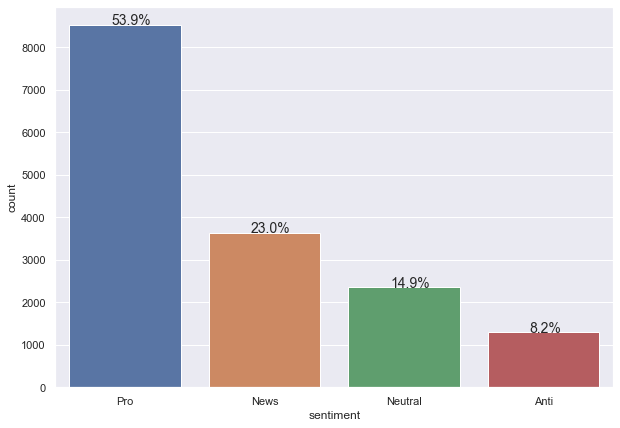

In [16]:
targets = tweets_copy['sentiment']                           # Identify the targets

#Creating a countplot for the features
sns.set(rc={'figure.figsize':(10,7)})
ax=sns.countplot(x=targets, data=tweets_copy)

total = len(targets)                                          # length of the column
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the sentiment
    x = p.get_x() + p.get_width() / 2 - 0.1                   # width of the plot
    y = p.get_y() + p.get_height()                            # heightt of the plot
    ax.annotate(percentage, (x, y), size = 14)                # annotate the percantage 
    
plt.show() # show the plot

From the output of the bar graph we can see that there is a clear imbalance in the data whereby the sentiments: 1 Pro: climate change holds the majority of tweets (53.9%). This may be addressed later depending on the difference it makes with model accuracy.

#### Wordclouds
Below we will create a wordcloud for each sentiment in order to identify high frequency words for each sentiment. First we clean the data a bit.

In [10]:
wordcloud_data = []
stop_words = stopwords.words('english')
punct = string.punctuation

message = tweets['message']
for i in range(len(message)):
    #Removing urls from messages
    tweet=re.sub(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?',' ',message.iloc[i]) 
    #Makes sure only letters are in the message
    tweet=re.sub('[^a-zA-Z]',' ',tweet)  
    #Convert all letters to lowercase and split them
    tweet=tweet.lower().split()   
    # Stems the words in tweet if it does notcontain stopwords and punctuation. 
    tweet=[word for word in tweet if (word not in stop_words) and (word not in punct)]  
    # Joining the cleaned split words
    tweet=' '.join(tweet)  
    # Creates a list of the cleaned tweets.
    wordcloud_data.append(tweet)  


In [12]:
tweets['message_clean'] = wordcloud_data
tweets['message_clean'].head()

0                   polyscimajor epa chief think carbon dioxide main cause global warming wait
1                                              like lack evidence anthropogenic global warming
2                              rt rawstory researchers say three years act climate change late
3                                           todayinmaker wired pivotal year war climate change
4    rt soynoviodetodas racist sexist climate change denying bigot leading polls electionnight
Name: message_clean, dtype: object

Next we will separate the tweets based on their sentiment.

In [13]:
pro_df = tweets[tweets['sentiment'] == 1]
anti_df = tweets[tweets['sentiment'] == -1]
neutral_df = tweets[tweets['sentiment'] == 0]
news_df = tweets[tweets['sentiment'] == 2]

#### Wordcloud for Sentiment : 1 Pro

In [26]:
add_stopwords = ["change","climate","rt", "global", "warming", "http","https"]

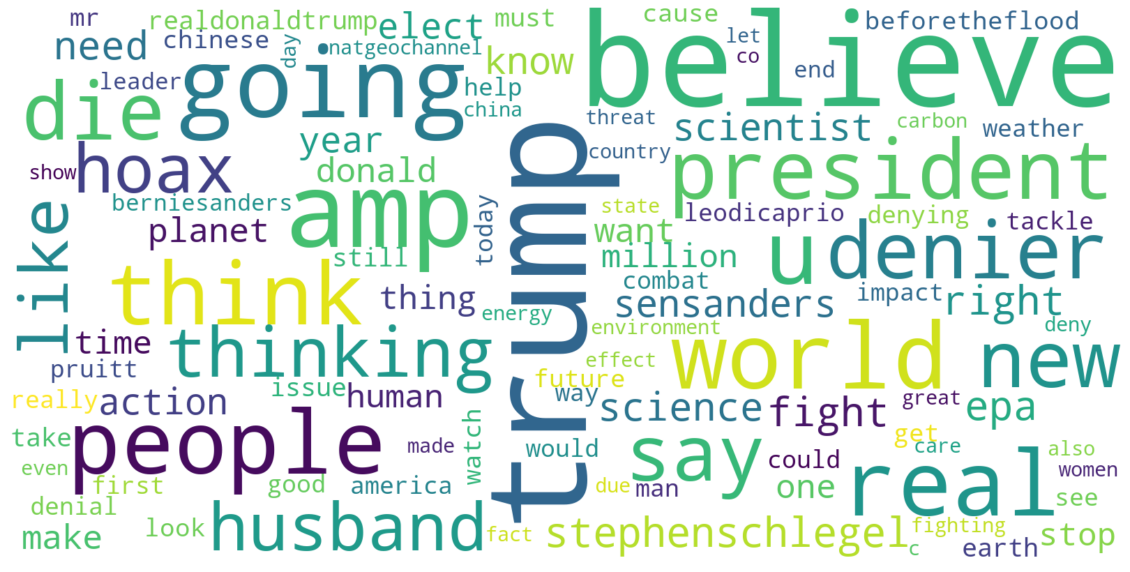

In [27]:
pro_wordcloud = pd.Series(pro_df['message_clean']).str.cat(sep=' ')   #This creates a list of single strings to generate the wordcloud.

wordcloud_1 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,stopwords=add_stopwords,
                       collocations = False, background_color = 'white').generate(pro_wordcloud)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

The wordcloud above shows the 100 most frequent words used for the 1 Pro sentiment tweets. "Climate" and "change" is use the most but that is to be expected because we have a dataset with tweets about climate change thus we remove those words in order to identify the important words for the specific sentiment. Further we can see that positive words like "believe", "real" and "action" is also frequently used.

#### Wordcloud for Sentiment : -1 Anti

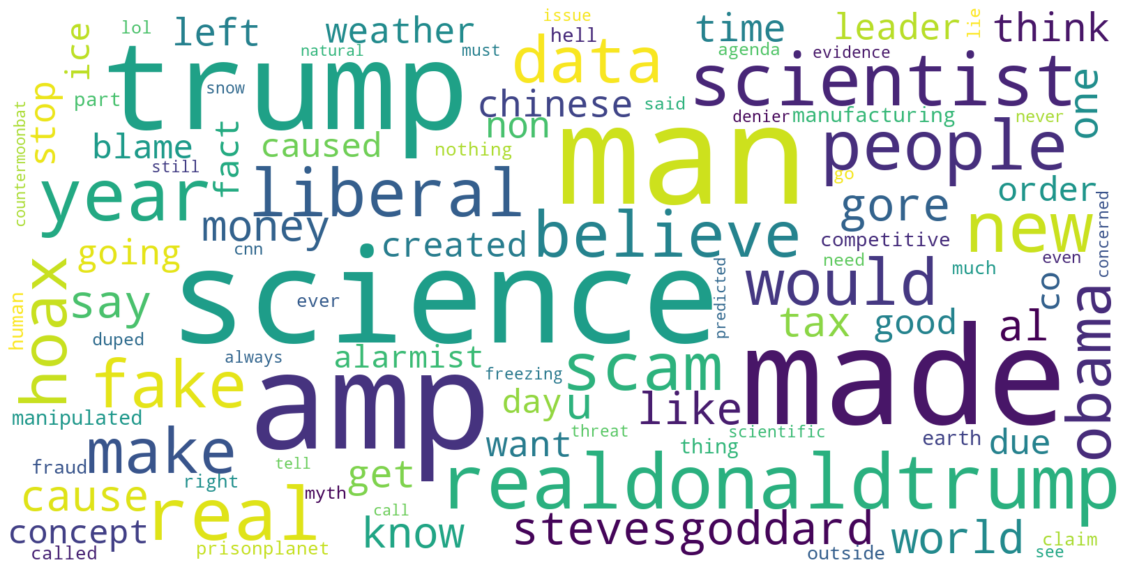

In [32]:
anti_df_wordcloud = pd.Series(anti_df['message_clean']).str.cat(sep=' ')   #This creates a list of single strings to generate the wordcloud.

wordcloud_1 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,stopwords=add_stopwords,
                       collocations = False, background_color = 'white').generate(anti_df_wordcloud)   #This creates a list of single strings to generate the wordcloud.


plt.figure(figsize=(20,20))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

The wordcloud above shows the 100 most frequent words used for the -1 Anti sentiment tweets. Here we can see high frequency negative words like, "fake", "hoax" and "scam" is more apperent in tweets with this sentiment.

#### Wordcloud for Sentiment : 0 Neutral

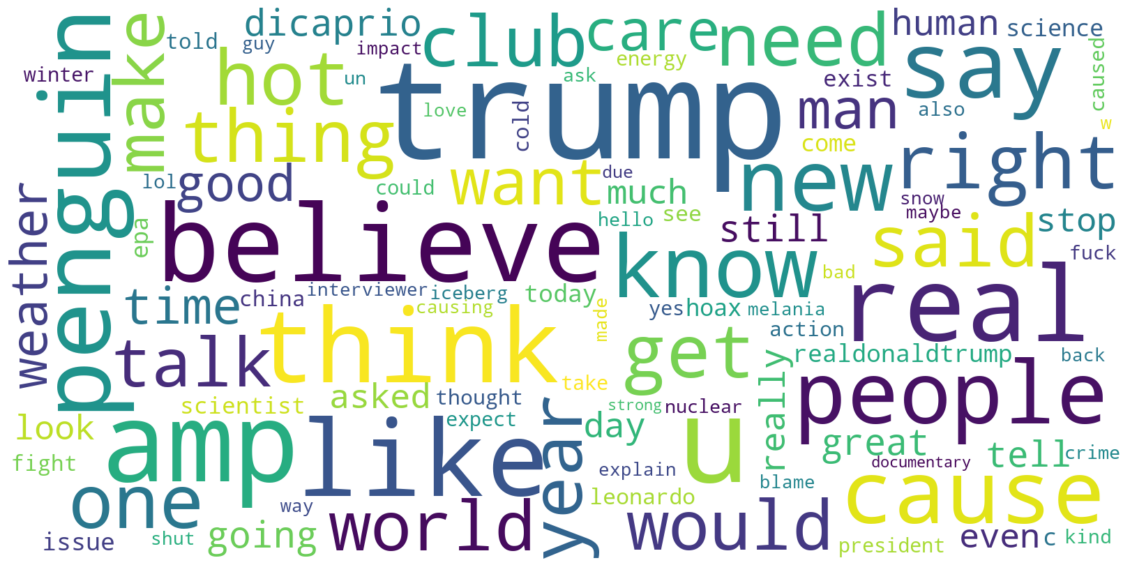

In [33]:
neutral_df_wordcloud = pd.Series(neutral_df['message_clean']).str.cat(sep=' ')   #This creates a list of single strings to generate the wordcloud.

wordcloud_1 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,stopwords=add_stopwords,
                       collocations = False, background_color = 'white').generate(neutral_df_wordcloud)   #This creates a list of single strings to generate the wordcloud.


plt.figure(figsize=(20,20))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

The wordcloud above shows the 100 most frequent words used for the 0 Neutral sentiment tweets. Here we can see there is very little positive or negative words that is used for neutral sentiment.

#### Wordcloud for Sentiment : 2 News

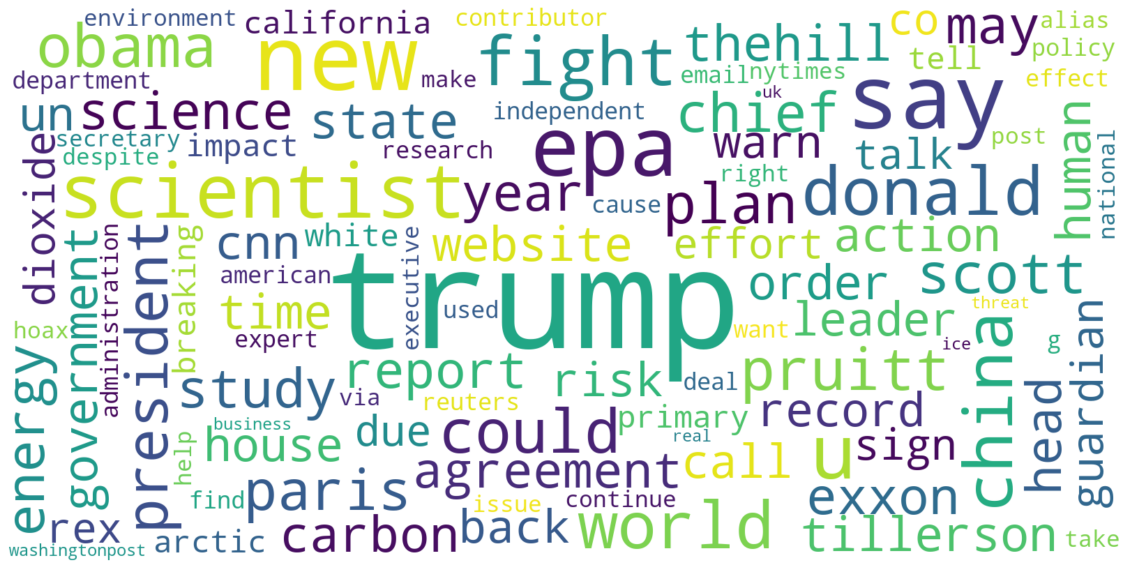

In [40]:
news_df_wordcloud = pd.Series(news_df['message_clean']).str.cat(sep=' ')   #This creates a list of single strings to generate the wordcloud.

wordcloud_1 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,stopwords=add_stopwords,
                       collocations = False, background_color = 'white').generate(news_df_wordcloud)   #This creates a list of single strings to generate the wordcloud.


plt.figure(figsize=(20,20))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

The wordcloud above shows the 100 most frequent words used for the 2 News sentiment tweets. Here we can see words like, "website", "article" and "report" that points to tweets that reference news sources.

 <a id="eight"></a>
## 8. Data Preprocessing  
<a href=#cont>Back to Table of Contents</a>

In NLP projects, the most important part is data preprocessing, to get it ready for modelling. We will be creating two datasets to train the models. The first dataset will contain the normal cleaned data and the second dataset will contain the resampled data to get rid of class imbalances.


### What do we need to do in Data Processing?

Remember our input is in the form of text. Machine learning models only understand and works with numbers. So we have to convert all the text into numbers.

The following techniques will be used to remove uncessary words:

1. Removing Stop Words and url: Words such as: ('this, an, a, the, etc') that do not affect the meaning of the tweet
2. Removing Punctuation: (‘,.*!’) and other punctuation marks that are not really needed by the model
3. Stemming: Which reduces words like ‘jumping, jumped, jump’ into their root word(also called stem), which is jump in this case. Since all variations of the root word convey the same meaning, we don’t need each of the word to be converted into different numbers.
4. Lemmatization: Lemmatizing is the process of grouping words of similar meaning together




#### Function to Clean the Data

A function to clean the data will be created beacause it will be used multiple times.

The clean_data() function will do the following:
- NLTK stopwords and punctuation will be declared.
- PorterStemmer() function will be initiated to stem the data.
- WordNetLemmatizer() function will be initiated to leammatize the data.
- Text clean using regular expression.

 First the stopwords and puntuation are declared for use outside the funtion aswell.

In [41]:
stop_words = stopwords.words('english')
punct = string.punctuation


Below is the data cleaning function.

In [42]:
# Function to clean data

def clean_data(df):
    """ 
    Takes in a pandas Series and returns a list of clean data.
    
    Args:
            df: pandas Series asd an object dtype containing text data.
                
    Retuns:
            clean_data: list of cleaned data
    
    
    """
    
    stemmer1 = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stop_words = stopwords.words('english')
    punct = string.punctuation

    clean_data = []
    
    for i in range(len(df)):
        #Removing urls from messages
        tweet=re.sub(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?',' ',df.iloc[i]) 
        #Makes sure only letters are in the message
        tweet=re.sub('[^a-zA-Z]',' ',tweet)  
        #Convert all letters to lowercase and split them
        tweet=tweet.lower().split()   
        # Stems the words in tweet if it does notcontain stopwords and punctuation. 
        tweet=[stemmer1.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]  
        # Lemmatize the words in the tweets                                                                                                  
        tweet = [lemmatizer.lemmatize(word) for word in tweet]  
        # Joining the cleaned split words
        tweet=' '.join(tweet)  
        # Creates a list of the cleaned tweets.
        clean_data.append(tweet)  
    return clean_data


Firstly, we create an empty list called cleaned_data, where will be storing our text data after getting rid of all unnecessary words.


To begin with, we run a for loop to iterate through each and every tweet in the dataset, at a time. Using re.sub we can substitute and replace items in a sentence. So we are basically taking one tweet at a time, and inside it whatever is not a letter(belonging to a-z or A-Z) and url, will be replaced by an empty space. It will automatically filter out punctuation marks and other non-letters.

In the next line, we convert all words into lower cases and split them into a list.

Next, we iterate through each word in a tweet, and if that word is not a stop word, and not a punctuation mark,we use the word, later this will be used to satisfy the condition for the stemming and lemmatization functions.

After that we join all the words using ‘’.join(tweet), to get a single sentence instead of separated words. And then we simply append that into the cleaned data list that we had created. 

This will be done for all features sets.



#### Identify Targets and Features
First we will look at the normal data that will be called cleaned_data_1.

In [54]:
X = tweets['message']
y = tweets['sentiment']

Call the function on X that is the features dataset.

In [55]:
cleaned_data_1 = clean_data(X)

Have a look at the cleaned data below.

In [51]:
cleaned_data_1[:5]

['polyscimajor epa chief think carbon dioxid main caus global warm wait',
 'like lack evid anthropogen global warm',
 'rt rawstori research say three year act climat chang late',
 'todayinmak wire pivot year war climat chang',
 'rt soynoviodetoda racist sexist climat chang deni bigot lead poll electionnight']

### Resampled data
Now we will create the dataset to try and correct the class imbalances.


#### Class imbalances
As we can see from the distrubution plot above there are inbalances in the datasaet. Below we will attempt to correct the imbalances in the data by resampling.

First we will create a dataset for each sentiment and check the length of each:

In [44]:
pro_df = tweets[tweets['sentiment'] == 1]
anti_df = tweets[tweets['sentiment'] == -1]
neutral_df = tweets[tweets['sentiment'] == 0]
news_df = tweets[tweets['sentiment'] == 2]

print('pro_df:' ,len(pro_df),'\nanti_df:',len(anti_df), '\nneutral_df:', len(neutral_df), '\nnews_df:', len(news_df))

pro_df: 8530 
anti_df: 1296 
neutral_df: 2353 
news_df: 3640


Below we will resample the data, as we can see the highest value is pro_df has 8530 entries, and the lowest value is anti_df with 1296, thus a good middle ground is news_df at 3640.
We will downsample data > 3640 and upsample data < 3640.

In [45]:
# Downsample
pro_df_scale = resample(pro_df,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(news_df), # match lenth of news_df
                          random_state=42) 

# Upsamle
neutral_df_scale = resample(neutral_df,
                          replace=True, # sample with replacement
                          n_samples=len(news_df), 
                          random_state=42)

anti_df_scale = resample(anti_df,
                          replace=True, # sample with replacement 
                          n_samples=len(news_df), 
                          random_state=42)

In [46]:
print('pro_df size:' ,len(pro_df_scale),'\nanti_df:',len(anti_df_scale), 
      '\nneutral_df:', len(neutral_df_scale), '\nnews_df:', len(news_df))

pro_df size: 3640 
anti_df: 3640 
neutral_df: 3640 
news_df: 3640


In [47]:
# combine dataframe

data = pd.concat([pro_df_scale,anti_df_scale,neutral_df_scale,news_df])
data.shape

(14560, 4)

As we can se from above the dataset is evenly balanced.

#### Identify Targets and Features of Resampled Data

First split the features and targets of the Resampled data and the clean the data with the "clean_data" function.

In [48]:
X_scale = data['message']
y_scale = data['sentiment']

In [49]:
cleaned_data_2 = clean_data(X_scale)

In [58]:
cleaned_data_2[:5]

['rt natgeochannel watch beforetheflood right leodicaprio travel world tackl climat chang',
 'rt sensand presid elect believ climat chang million peopl go say mr',
 'rt octorg fed court rule right octorg youth threaten climat chang help proceed trial',
 'rt aiannucci u elect trump rest world u polici climat chang threaten',
 'rt sensand presid elect believ climat chang frighten countri world']

Above we created two goups of cleaned data.

Let’s have a look at the output column ‘y’

In [59]:
y.head()

0    1
1    1
2    2
3    1
4    1
Name: sentiment, dtype: int64

As we can see the output is already in numeric format, so no processing is necessary.

 <a id="nine"></a>
## 9. Build the NLP models
<a href=#cont>Back to Table of Contents</a>

In this section we will build multiple models in order to find the most accurate model, the accuracy of the model will be measured by the f1 score. Now to build the model we split the dataset into a training and testing datasets(testing size=20% of the actual data and use random_state = 42). To actually fit the model, we call the model.fit function and supply it the training input and output.

### Training and Testing Sets
The training dataset will be used to train a model and the testing set will be used to test how accurate the model is in classifying unseen data.

In [59]:
X_1 = cleaned_data_1 # Normal data
y_1 = tweets['sentiment']

X_2 = cleaned_data_2 #Resampled data
y_2 = data['sentiment']


# Split 1 : Normal data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2 , random_state = 42)

# Split2 : Resampled data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2 ,y_2, test_size=0.2 , random_state = 42)


### Transforming Dataset: Text to Numeric

Algoritms use numeric data to train models. Thus to make algorithms works with text, we have to convert text to numbers. We will use the [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) method to do this.

We will be using the TfidfVectorizer method to convert the text data into numeric data. The TfIDF vectorizer reflects the importance of a word in the text as a numerical statistic. We will use max_features=10 000 so that our model is not to resource intensive.

In [60]:
# Declare TfidfVectorizer
TDIF_vector_1 = TfidfVectorizer(max_df=0.9, ngram_range=(1, 5), analyzer= 'char',max_features=10000)

# Fit and transform the data for normal data
X_train_1 = TDIF_vector_1.fit_transform(X_train_1).toarray() # Only fit training data
X_test_1 = TDIF_vector_1.transform(X_test_1).toarray()

# Declare TfidfVectorizer
TDIF_vector_2 = TfidfVectorizer(max_df=0.9, ngram_range=(1, 5), analyzer= 'char',max_features=10000)

# Fit and transform the data for resampled data
X_train_2 = TDIF_vector_2.fit_transform(X_train_2).toarray() # Only fit training data
X_test_2 = TDIF_vector_2.transform(X_test_2).toarray()


Below we can see all the features that was created by the TDIF vectorizer and we can also see a sample of the array that was created by the vectorize.

In [67]:
TDIF_vector_1.get_feature_names()

[' a',
 ' ab',
 ' abo',
 ' ac',
 ' acc',
 ' acce',
 ' acco',
 ' act',
 ' act ',
 ' acti',
 ' actu',
 ' ad',
 ' ada',
 ' adap',
 ' add',
 ' addr',
 ' adm',
 ' admi',
 ' adv',
 ' advi',
 ' af',
 ' aff',
 ' affe',
 ' afr',
 ' afri',
 ' ag',
 ' age',
 ' age ',
 ' agen',
 ' ago',
 ' agr',
 ' agre',
 ' agri',
 ' ah',
 ' ahe',
 ' ahea',
 ' ai',
 ' air',
 ' air ',
 ' aj',
 ' al',
 ' al ',
 ' al g',
 ' ala',
 ' alar',
 ' ale',
 ' ali',
 ' alia',
 ' all',
 ' alr',
 ' alre',
 ' als',
 ' also',
 ' alt',
 ' alw',
 ' alwa',
 ' am',
 ' ame',
 ' amer',
 ' amo',
 ' amp',
 ' amp ',
 ' an',
 ' and',
 ' ang',
 ' ani',
 ' anim',
 ' ann',
 ' ano',
 ' anot',
 ' ans',
 ' ant',
 ' anta',
 ' anti',
 ' any',
 ' anyt',
 ' ap',
 ' app',
 ' appr',
 ' ar',
 ' arc',
 ' arct',
 ' arg',
 ' argu',
 ' aro',
 ' arou',
 ' art',
 ' arti',
 ' as',
 ' ask',
 ' ask ',
 ' ass',
 ' ast',
 ' at',
 ' att',
 ' atta',
 ' atte',
 ' au',
 ' aus',
 ' aust',
 ' aut',
 ' av',
 ' aw',
 ' awa',
 ' away',
 ' b',
 ' b ',
 ' ba',
 ' bac',
 ' 

In [63]:
X_train_1[0:10]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06449115, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

The TfidfVectorizer function converts a list of words into bag of words, however notice that we specify something called as the max features to it. Basically as you might have seen in the bag of words illustration table, each word will have separate column. This number of columns can explode into large numbers in big datasets.

To avoid this we set the max columns as 10000, and basically keep the maximum occurring 10000 words.

Finall the TDIF_vector_1.fit_transform function takes the X_test_1 data and converts it into the bag of words that we wanted.

### Models training and predict
Below multiple models will be created in order to determine the best model.
All models with the postfix "_1" is the normal data model and "_2" is the resampled data.

#### Model 1: MultinomialNB

Multinomial Naive Bayes algorithm is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem . 

Advantages:
- easy to implement as you only have to calculate probability
- It is simple and can be used for predicting real-time applications
- highly scalable and can easily handle large datasets

Disadvantages:
- The prediction accuracy of this algorithm is lower than the other probability algorithms.
- It is not suitable for regression. Naive Bayes algorithm is only used for textual data classification and cannot be used to predict numeric values.

More information can be found [here](https://www.upgrad.com/blog/multinomial-naive-bayes-explained/).

In [64]:
# Initialize model

MNB_model_1 = MultinomialNB()

# Fit the model
MNB_model_1.fit(X_train_1, y_train_1)
#Create Predition
y_pred_1 = MNB_model_1.predict(X_test_1)

#Get f1_score

f1score_1 = f1_score(y_test_1, y_pred_1, average= 'weighted')
print('macro f1 score:', f1score_1)
experiment.log_metric("f1_score", f1score_1)

macro f1 score: 0.6633316715747973


In [65]:
MNB_model_2 = MultinomialNB()

MNB_model_2.fit(X_train_2, y_train_2)
y_pred_2 = MNB_model_2.predict(X_test_2)


f1score_2 = f1_score(y_test_2, y_pred_2, average= 'weighted')
print('macro f1 score:', f1score_2)
experiment.log_metric("f1_score", f1score_2)

macro f1 score: 0.6501308459462658


#### Model 2: LogisticRegression

Logistic Regression is a supervised Machine Learning algorithm, which means the data provided for training is labeled, answers are already provided in the training set. The algorithm learns from those examples and their corresponding answers (labels) and then uses that to classify new examples.


Advantages:
- LogisticRegression is easy to implement because of its efficient and straightforward nature.
- It also does not require the scaling of feutures.

Disadvantages:
- LogisticRegression is not able to handle a large number of categorical features. 
- It is vulnerable to overfitting. 

More information can be found [here](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python) and [here](https://asperbrothers.com/blog/logistic-regression-in-python/)




In [66]:
LR_model_1 = LogisticRegression()

LR_model_1.fit(X_train_1, y_train_1)
y_pred_4 = LR_model_1.predict(X_test_1)


f1score_4 = f1_score(y_test_1, y_pred_4, average= 'weighted')
print('macro f1 score:', f1score_4)
experiment.log_metric("f1_score", f1score_4)

macro f1 score: 0.7088298814040414


In [67]:
LR_model_2 = LogisticRegression()

LR_model_2.fit(X_train_2, y_train_2)
y_pred_5 = LR_model_2.predict(X_test_2)



f1score_5 = f1_score(y_test_2, y_pred_5, average= 'weighted')
print('macro f1 score:', f1score_5)
experiment.log_metric("f1_score", f1score_5)

macro f1 score: 0.7446206922400429


#### Model 3: RandomForestClassifier

RandomForestClassifier is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

Advantages:
- It reduces overfitting experienced in decision trees and helps to improve the accuracy
- It is flexible to both classification and regression problems
- It works well with both categorical and continuous values

Disadvantages:
- It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
- It also requires much time for training as it combines a lot of decision trees to determine the class.
- Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.

More information can be found [here](https://www.mygreatlearning.com/blog/random-forest-algorithm/)

In [68]:
Forest_model_1 = RandomForestClassifier()

Forest_model_1.fit(X_train_1, y_train_1)
y_pred_7 = Forest_model_1.predict(X_test_1)



f1score_7 = f1_score(y_test_1, y_pred_7, average= 'weighted')
print('macro f1 score:', f1score_7)
experiment.log_metric("f1_score", f1score_7)

macro f1 score: 0.6638510515205219


In [69]:
Forest_model_2 = RandomForestClassifier()

Forest_model_2.fit(X_train_2, y_train_2)
y_pred_8 = Forest_model_2.predict(X_test_2)



f1score_8 = f1_score(y_test_2, y_pred_8, average= 'weighted')
print('macro f1 score:', f1score_8)
experiment.log_metric("f1_score", f1score_8)

macro f1 score: 0.8036460076067887


#### Model_4: LinearSVC

Concerning supervised machine learning space, Support Vector Machines can deal with linear as well as non-linear problems, they can also do classification as well as regression.

Advantages:
- Thrives in High Dimension
- Cab be applied to both Classification and Regression problems
- Fast Prediction

Disadvantages:
- SVMs are not the most efficient algorithms and it can be quite costly computationally to train them.
- Overfitting is another potential side effect of Support Vector Machines and it can be quite difficult to detect or fix at times.
- Support Vector Machines don't provide very sophisticated and interpretable reports that can be interpreted in an easy fashion.

More information can be found [here](https://holypython.com/svm/support-vector-machine-pros-cons/)


In [70]:
svc_model_1 = LinearSVC()

svc_model_1.fit(X_train_1, y_train_1)
y_pred_10 = svc_model_1.predict(X_test_1)

f1score_10 = f1_score(y_test_1, y_pred_10, average= 'weighted')
print('macro f1 score:', f1score_10)
experiment.log_metric("f1_score", f1score_10)

macro f1 score: 0.7109279635492974


In [71]:
svc_model_2 = LinearSVC()

svc_model_2.fit(X_train_2, y_train_2)
y_pred_11 = svc_model_2.predict(X_test_2)

f1score_11 = f1_score(y_test_2, y_pred_11, average= 'weighted')
print('macro f1 score:', f1score_11)
experiment.log_metric("f1_score", f1score_11)

macro f1 score: 0.7892485253026298


 <a id="ten"></a>
## 10. Model Evaluation
<a href=#cont>Back to Table of Contents</a>

Models will be compared based on the f1 score the model in tabular format.


In [72]:
model_comp = {'model_name' : ['MultinomialNB_1', 'MultinomialNB_2',
                              'LogisticRegression_1', 'LogisticRegression_2',
                              'RandomForestClassifier_1', 'RandomForestClassifier_2',
                             'LinearSVC_1', 'LinearSVC_2'
                             ],
                   'f1_score' : [f1score_1, f1score_2,
                                 f1score_4 ,f1score_5,
                                 f1score_7, f1score_8,
                                f1score_10, f1score_11]
                                 }


model_comp_df = pd.DataFrame(model_comp)

In [73]:
model_comp_df.sort_values('f1_score',ascending=False)

,model_name,f1_score
5,RandomForestClassifier_2,0.803646
7,LinearSVC_2,0.789249
3,LogisticRegression_2,0.744621
6,LinearSVC_1,0.710928
2,LogisticRegression_1,0.708830
4,RandomForestClassifier_1,0.663851
0,MultinomialNB_1,0.663332
1,MultinomialNB_2,0.650131


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'RandomForestClassifier_2'),
  Text(1, 0, 'LinearSVC_2'),
  Text(2, 0, 'LogisticRegression_2'),
  Text(3, 0, 'LinearSVC_1'),
  Text(4, 0, 'LogisticRegression_1'),
  Text(5, 0, 'RandomForestClassifier_1'),
  Text(6, 0, 'MultinomialNB_1'),
  Text(7, 0, 'MultinomialNB_2')])

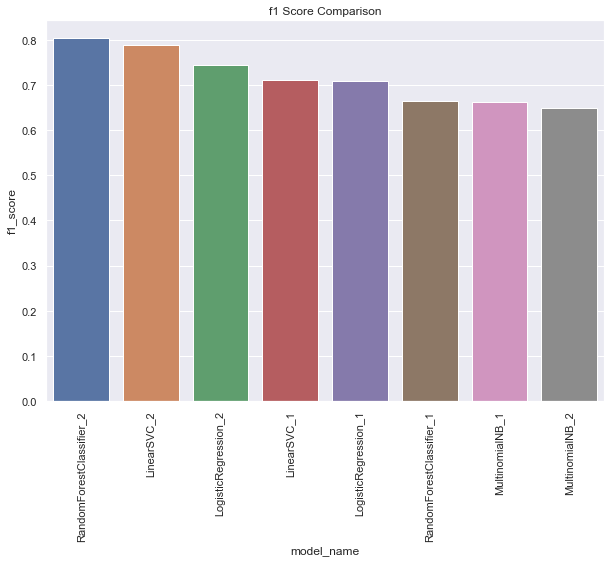

In [95]:

sns.barplot(x= 'model_name', y= 'f1_score', data = model_comp_df.sort_values('f1_score',ascending=False))
plt.title("f1 Score Comparison")
plt.xticks(rotation=90)

The bar graph shows that the Random forest classifier using resampled (balanced) data has the highest f1 score as compared to the other models. Overall the models trained on resampled data are more accurate for yhe test se of this data. Next the model will be tested on real word data to see if there is a difference.

 <a id="eleven"></a>
## 11. Kaggle submition
<a href=#cont>Back to Table of Contents</a>

Below we will do the preprocessing and prediction on our Kaggel test data and save the submission to a csv file. For more information about this competition please visit [Kaggle](https://www.kaggle.com/c/202122-climate-change-belief-analysis/overview).

#### Preprocessing for Kaggle Test data

In [33]:
# Load the data
test_df = pd.read_csv('test_with_no_labels.csv')

# Identify the features
X_test_features = test_df['message']

# Clean the data
cleaned_data = clean_data(X_test_features)

# Transform data to correct vectorizer
#X_fin = TDIF_vector_1.transform(cleaned_data).toarray()       # Non scaled data                  
#X_fin = TDIF_vector_2.transform(cleaned_data).toarray()       # Scaled data
    


#### Predict as save as csv

In [34]:
# Create a prediction
y_pred_test = svc_model_2.predict(X_fin)

test_df['sentiment'] = y_pred_test
output_df = test_df[['tweetid', 'sentiment']]

# .to_csv creates a new csv file in the local folder
output_df.to_csv('svc_model_2.csv', index = False)

 <a id="twelve"></a>
## 12. Pickled Models
<a href=#cont>Back to Table of Contents</a>

To create the Streamlit app we need to save the models we intent to us as well as the Bag of Words method which is the TDIFVectorizer method.

In [113]:
# Logistice Regression model 1

LR_model_1_path = 'trained models\LR_model_1.pkl'

with open(LR_model_1_path, 'wb') as file:
    pickle.dump(LR_model_1, file)
    
# LinearSVC model 1

svc_model_1_path = 'trained models\svc_model_1.pkl'

with open(svc_model_1_path, 'wb') as file:
    pickle.dump(svc_model_1, file)
    
# Random forest model 1

Forest_model_1_path = 'trained models\Forest_model_1.pkl'

with open(Forest_model_1_path, 'wb') as file:
    pickle.dump(Forest_model_1, file)
    
# MNB_model_1

MNB_model_1_path = 'trained models\MNB_model_1.pkl'

with open(MNB_model_1_path, 'wb') as file:
    pickle.dump(MNB_model_1, file)
    
# Bag of Words: TDIFVectorizer

count_vector_1_path = 'trained models\count_vector_1.pkl'

with open(count_vector_1_path, 'wb') as file:
    pickle.dump(count_vector_1, file)

 <a id="thirteen"></a>
## 13. Conclusion
<a href=#cont>Back to Table of Contents</a>

From the evaluation table above we can see that RandomForestClassifier_2 has the best f1 score at 0.806, but on unseen data from kaggle it obtained a score of 0.69515. The model that gave the score on kaggle was LogisticRegression_1 with a score of 0.72145 (see figure below). From this we can see although the resampled data scores higher on the test split of the data it scores worse on real world data as was proved by the score on kaggle. We can conclude that the data imbalance had no effect on training of the model and subsequently on the accuracy of the model. Thus going forward all data can be cleaned using cleaned_data_1 and the LogisticRegression model can be used to make predictions.

To further improve the predictive power of the models we can do additional processing and hyperparameter tuning.

![title](kaggle_proof.jpg)

In [75]:
experiment.display()

In [94]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/christinah-chokwe-gmail-com/team-9-jhb-classification/fee1f2904314422791520eb3eb3ec128
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     f1_score [8] : (0.6501308459462658, 0.8036460076067887)
COMET INFO:   Parameters:
COMET INFO:     C                        : 1.0
COMET INFO:     alpha                    : 1.0
COMET INFO:     bootstrap                : True
COMET INFO:     ccp_alpha                : 0.0
COMET INFO:     class_prior              : 1
COMET INFO:     class_weight             : 1
COMET INFO:     criterion                : gini
COMET INFO:     dual                     : True
COMET INFO:     fit_intercept            : True
COMET INFO:     fit_prior                : True
COMET INFO:     intercept_scaling        : 1
COMET INFO:   